In [8]:
pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("thyroid_cancer_risk_data.csv")
print(df.head())

   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [17]:
print("\nDataset Information:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nDuplicate Rows:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64


/tmp/ipykernel_18908/1938614870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Thyroid_Cancer_Risk', data=df, palette='Set2')


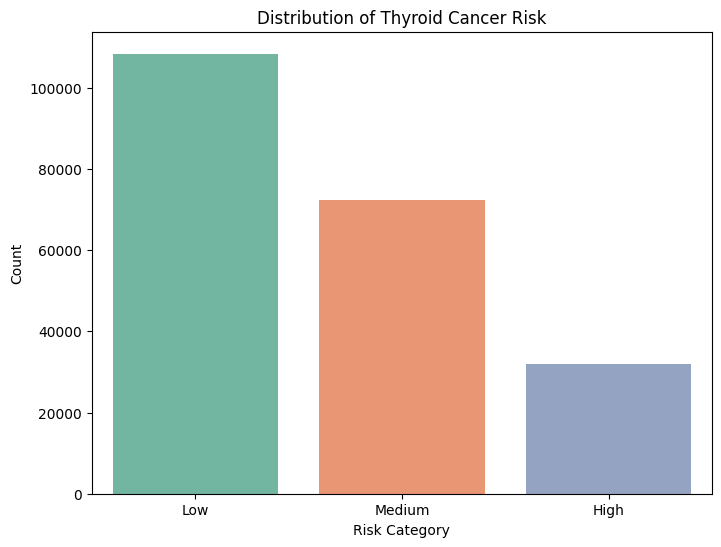

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Thyroid_Cancer_Risk', data=df, palette='Set2')
plt.title('Distribution of Thyroid Cancer Risk')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

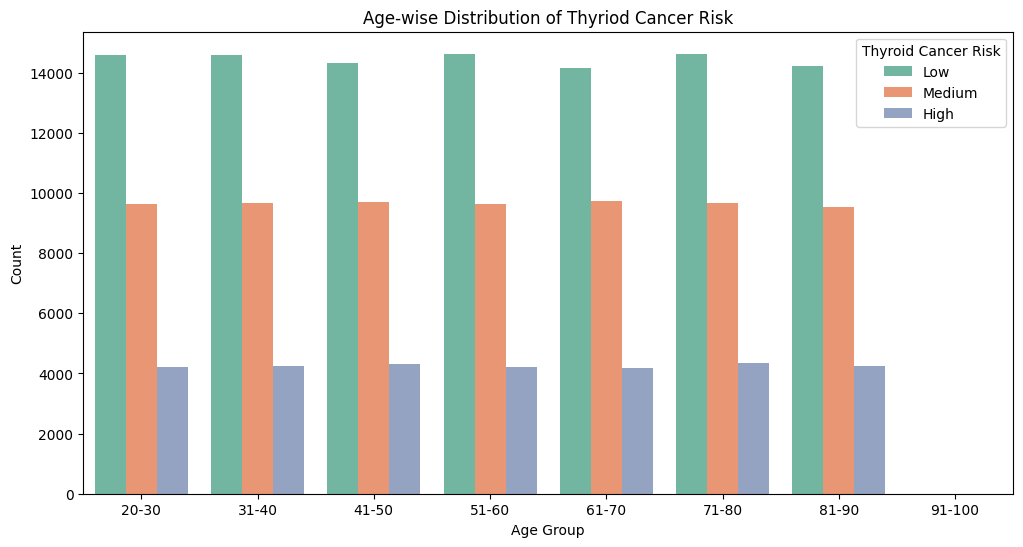

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
plt.figure(figsize=(12, 6))

sns.countplot(x='Age_Group', hue='Thyroid_Cancer_Risk', data=df, palette='Set2')

plt.title('Age-wise Distribution of Thyriod Cancer Risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Thyroid Cancer Risk')

plt.show()

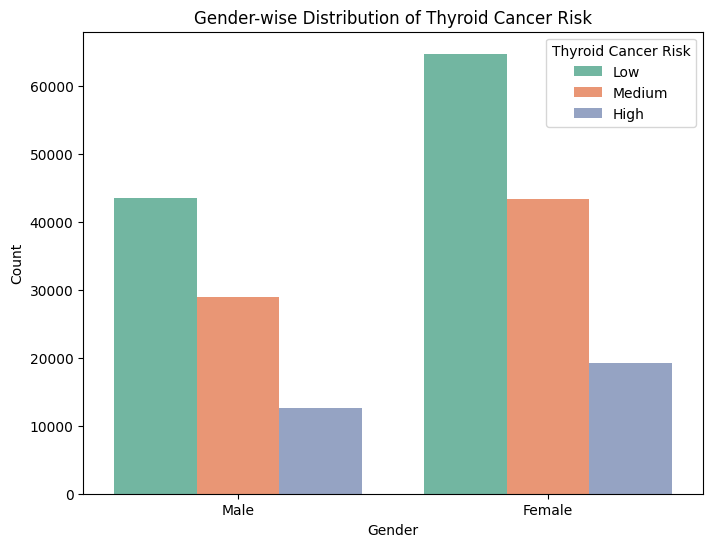

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.countplot(x='Gender', hue='Thyroid_Cancer_Risk', data=df, palette='Set2')

plt.title('Gender-wise Distribution of Thyroid Cancer Risk')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Thyroid Cancer Risk')

plt.show()

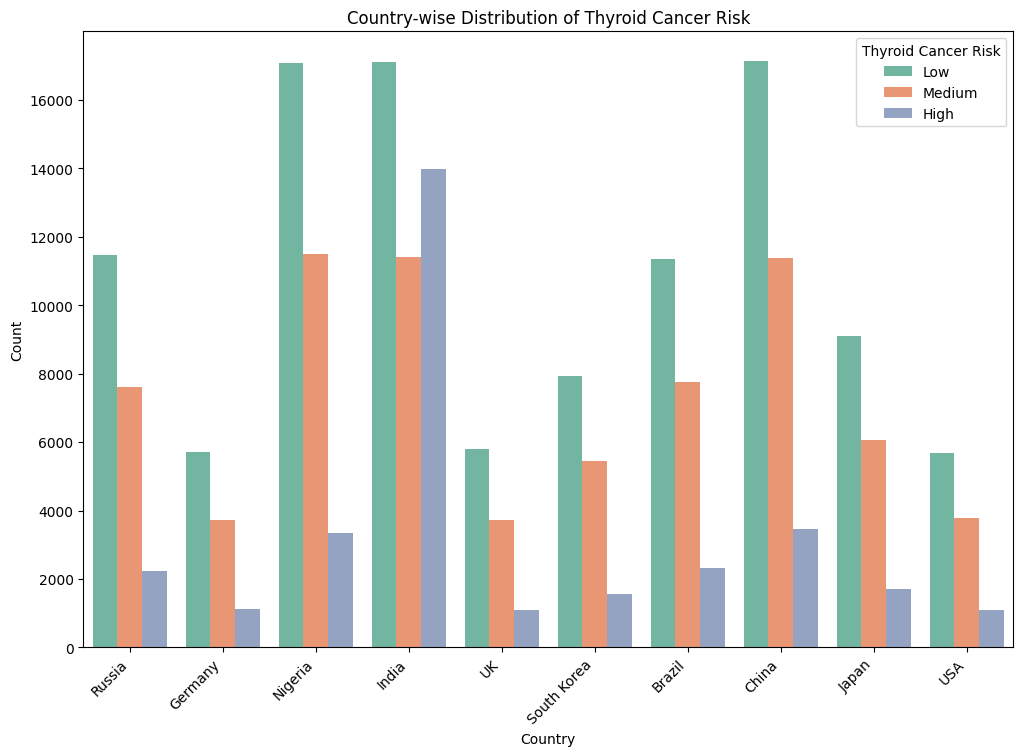

In [29]:
plt.figure(figsize=(12, 8))

top_countries = df['Country'].value_counts().nlargest(10).index

sns.countplot(x='Country', hue='Thyroid_Cancer_Risk', data=df[df['Country'].isin(top_countries)], palette='Set2')

plt.title('Country-wise Distribution of Thyroid Cancer Risk')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Thyroid Cancer Risk')

plt.show()

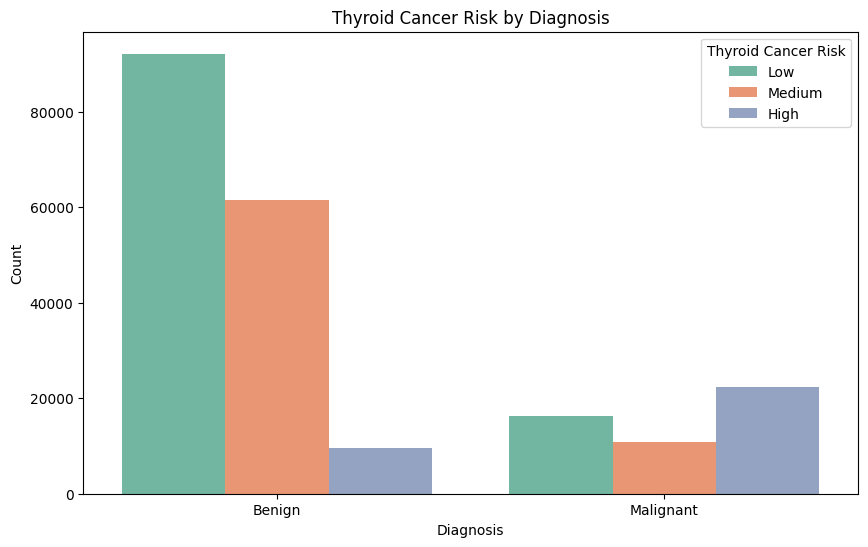

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(x='Diagnosis', hue='Thyroid_Cancer_Risk', data=df, palette='Set2')

plt.title('Thyroid Cancer Risk by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Thyroid Cancer Risk')

plt.show()

/tmp/ipykernel_18908/3467774464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Thyroid_Cancer_Risk', y='Age', data=average_age_by_risk, palette='Set2')


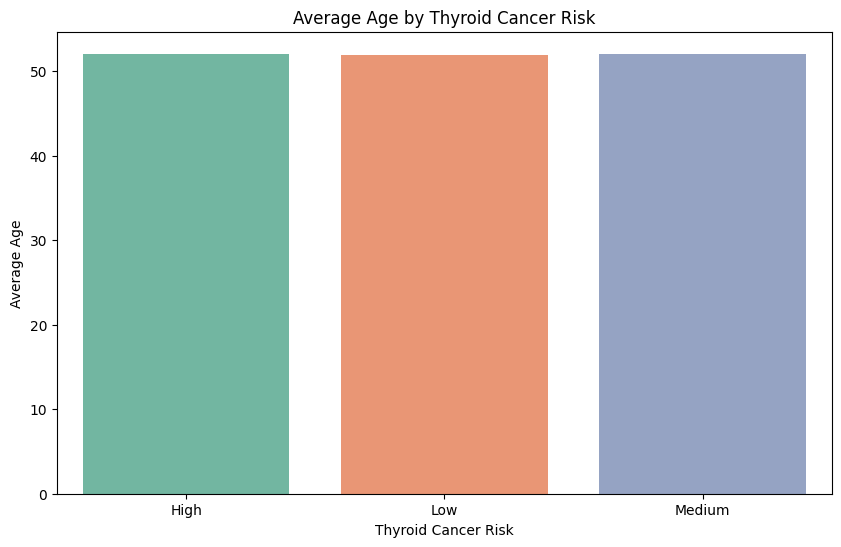

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

average_age_by_risk = df.groupby('Thyroid_Cancer_Risk')['Age'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Thyroid_Cancer_Risk', y='Age', data=average_age_by_risk, palette='Set2')

plt.title('Average Age by Thyroid Cancer Risk')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Average Age')

plt.show()

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


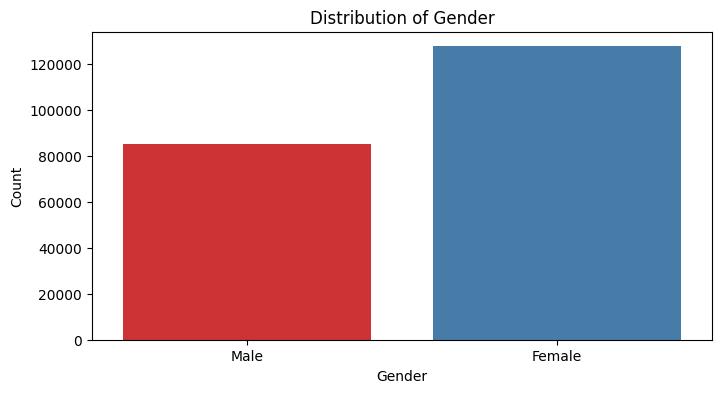

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


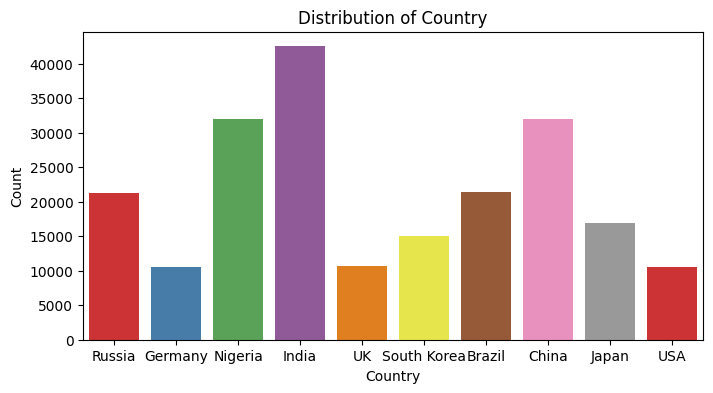

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


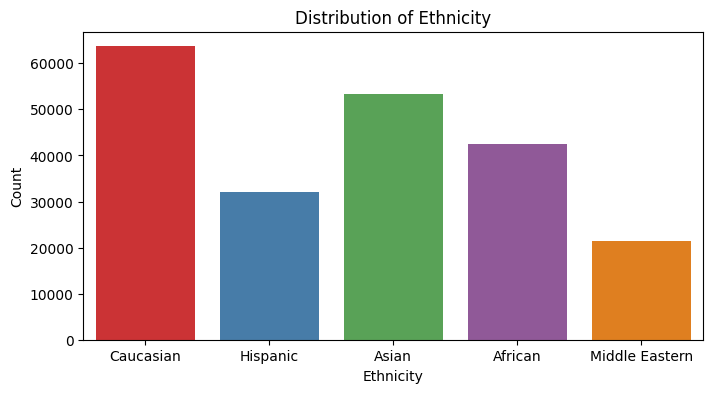

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


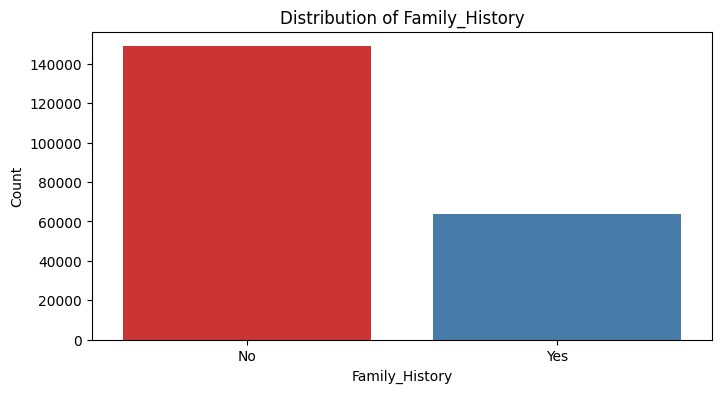

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


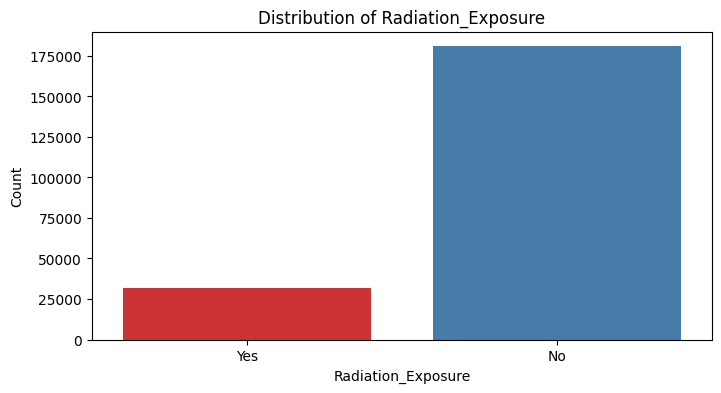

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


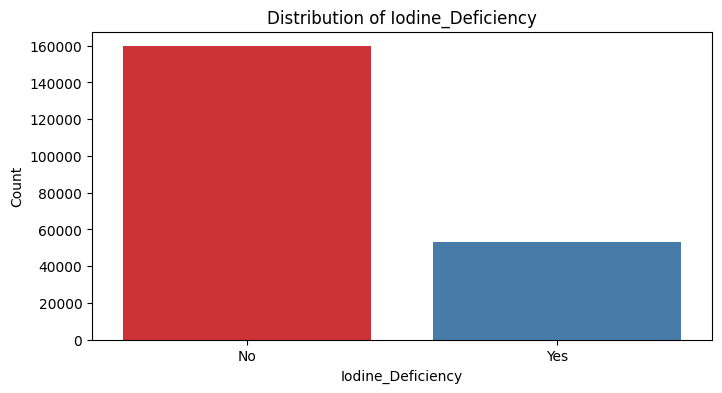

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


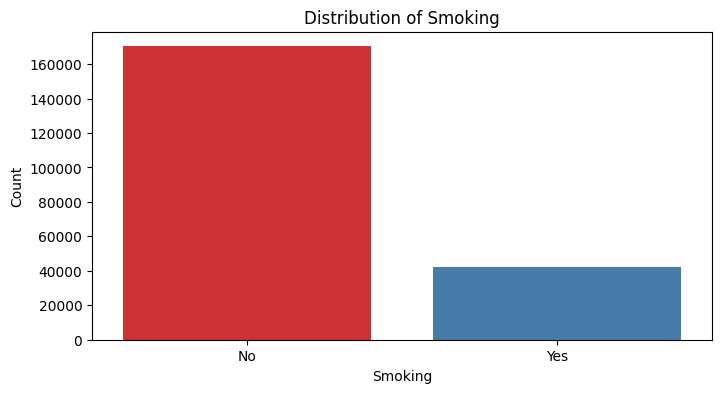

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


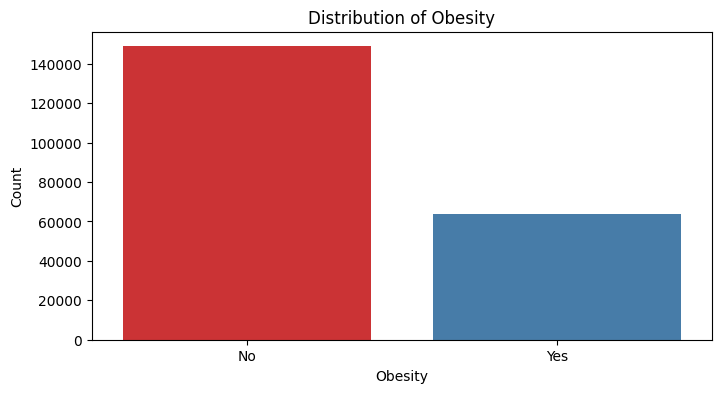

/tmp/ipykernel_18908/539574623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


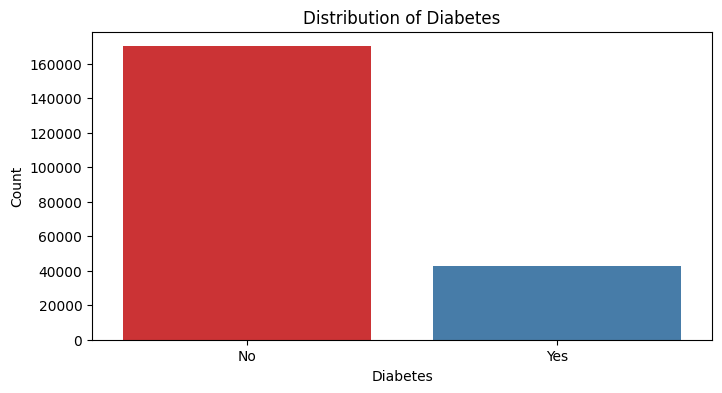

In [40]:
categorical_cols = ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set1')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()